# DATSET 
   CITY PAYROLL - This Data includes department titles, job titles, projected annual salaries (with breakdowns of quarterly pay), bonuses, and benefits information for the city of Los Angeles. 
   Data Source: https://www.kaggle.com/cityofLA/city-payroll-data
   
# Analysis 
   I live in the city of Los Angeles, a very large city. With having so many people live, work, and visit the city requires a huge amount of employees to provide the services to keep the city operational. This report uses The city pay roll to look at trends in the employee benefits.  Using this information I wanted to answer the following questions. What types of departments make up the city of L.A? Do Employee Benfeits vary significantly between departments? What are the average cost of the benefit plans?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
la = pd.read_csv(r'C:\Users\moren\OneDrive\Documents\la-city-payroll-data\data.csv', low_memory=False )
la.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


# Department Types

In [3]:
#Departments and Number of Employees
la['Department Title'].value_counts()

Police (LAPD)                                                   66057
Water And Power (DWP)                                           53545
Recreation And Parks                                            35344
Fire (LAFD)                                                     18134
Airports (LAWA)                                                 18060
Public Works - Sanitation                                       14740
Transportation (LADOT)                                           9701
General Services                                                 7661
Library                                                          7296
Harbor (Port of LA)                                              5604
Building and Safety                                              4729
City Attorney                                                    4542
Public Works - Street Services                                   4509
Public Works - Engineering                                       3863
Personnel           

The city of L.A has many departments and in order to focus on just the benefits recieved by each department, I grouped toghether just the columns of data that had to do with health benefits. I also included Employment type and Projected annual salary to look at two other key factors.

In [4]:
benefits = la[['Department Title', 'Job Class Title', 'Employment Type', 
               'Projected Annual Salary', 'Average Health Cost', 'Average Dental Cost', 
               'Average Basic Life', 'Average Benefit Cost', 'Benefits Plan']]

In [5]:
benefits.head()

,Department Title,Job Class Title,Employment Type,Projected Annual Salary,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan
0,Water And Power (DWP),Commercial Service Representative,Full Time,$70386.48,$16842.08,$1282.61,$0.00,$18124.69,DWP
1,Police (LAPD),Police Officer I,Full Time,$52450.56,$11651.40,$898.08,$191.04,$12740.52,Police
2,Police (LAPD),Police Officer II,Full Time,$89303.76,$11651.40,$898.08,$191.04,$12740.52,Police
3,Harbor (Port of LA),Senior Security Officer,Full Time,$60028.96,$10710.24,$405.24,$11.40,$11126.88,City
4,Public Works - Sanitation,Senior Clerk Typist,Full Time,$64553.13,$11000.40,$409.68,$11.40,$11421.48,City


Using only the benifits plan column I can determine that there are four types of Benefit plans that I can use to group each department title under. 

In [6]:
benefits['Benefits Plan'].value_counts()

City      125266
DWP        53030
Police     51069
Fire       16561
Name: Benefits Plan, dtype: int64

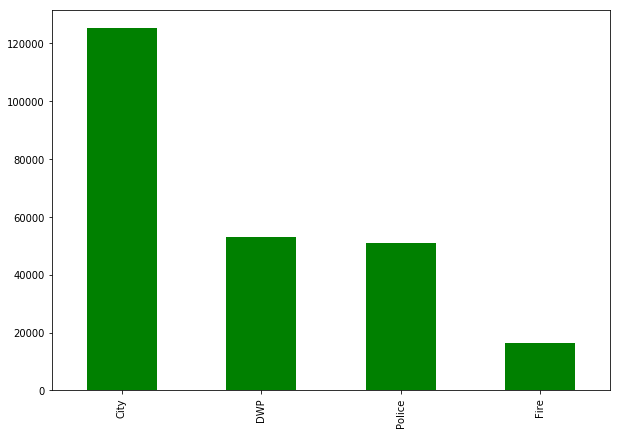

In [7]:
benefits['Benefits Plan'].value_counts().plot(kind='bar', figsize= (10,7), color="green" )

The vast majority of payroll employees are Full Time, whereas a small minority are Part Time or Per Event. This is important to look at because I want to see if my averages are going to be durastically influenced by the type of employment. Employees usually tend to have different benefits depending on employment type.

In [8]:
by_empl_type = benefits.groupby('Employment Type')

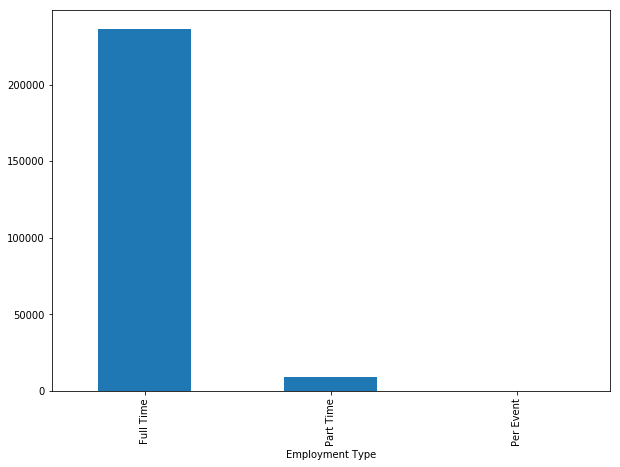

In [9]:
by_empl_type['Benefits Plan'].count().plot(kind='bar', figsize=(10,7))


# Do Employee Benfeits vary significantly between departments?  and What are the average cost of the benefit plans?

In [10]:
# Remove dollar sign in the strings of all salary and cost data entries
benefits = benefits.replace( '[\$,)]','', regex=True )

# Convert salaries and costs to numeric
benefits[['Projected Annual Salary', 
          'Average Health Cost', 
          'Average Dental Cost', 
          'Average Basic Life',
          'Average Benefit Cost']] = benefits[['Projected Annual Salary', 
                                               'Average Health Cost', 
                                               'Average Dental Cost', 
                                               'Average Basic Life', 
                                               'Average Benefit Cost']].apply(pd.to_numeric)

I test out one of the benefits plans to find the mean. I group all the benefits to find the Average of each benefit and organize it by Benefit Plan. This shows what Each plan spends the most on. The DWP (Department of Water&power) spends the MOST in both Health, Dental, and none on Basic life. It spends the most Over all and does have the highest benefit cost for its employees. The City spends the LEAST on three of the four categories. Both Fire and Police have very similar averages in spending. This gives some understanding of the differences in benefits by departments.

In [11]:
fire = benefits[benefits['Benefits Plan'] == 'Fire']

In [12]:
fire['Average Benefit Cost'].mean()

14017.876734497844

In [13]:
by_plan = benefits.groupby('Benefits Plan')

In [14]:
by_plan[['Average Health Cost', 'Average Dental Cost', 
         'Average Basic Life', 'Average Benefit Cost']].mean()

,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost
Benefits Plan,,,,
City,10224.177159,379.664718,10.565993,10614.407871
DWP,17144.440031,1261.268069,0.000000,18405.708101
Fire,12942.125659,900.633882,175.117193,14017.876734
Police,12237.952930,889.987808,191.217983,13319.158721


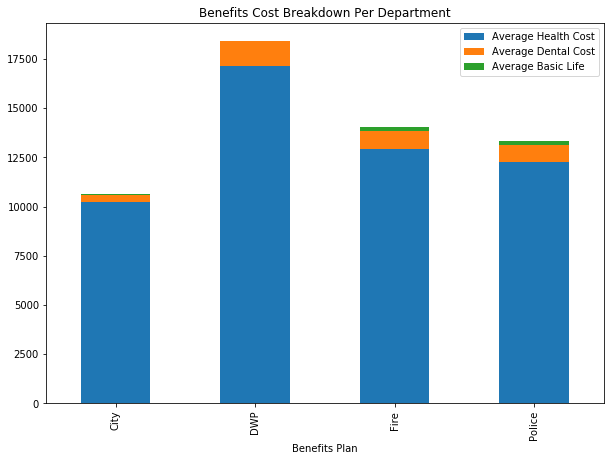

In [15]:
by_plan[['Average Health Cost', 
         'Average Dental Cost', 
         'Average Basic Life']].mean().plot(kind='bar', stacked=True, figsize=(10, 7), 
                                            title='Benefits Cost Breakdown Per Department')

Now that we see how much is spent on benefits alone we can compare it to the Projected Annual Salary of the four benefits/departements. We can predict who is expected to spend the most on their benefits, in this case DWP and the Police department based on salary.

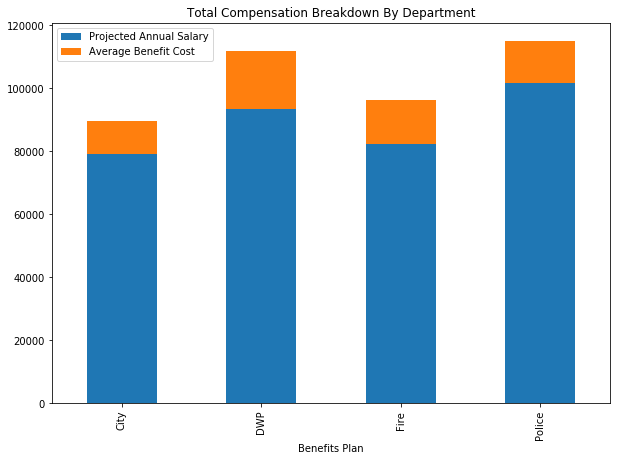

In [16]:
by_plan[['Projected Annual Salary', 
         'Average Benefit Cost']].mean().plot(kind='bar', stacked=True, figsize=(10, 7),
                                             title='Total Compensation Breakdown By Department')

# Further Research
    Every year cities have to analyse where their money is being spent depending on budget cuts, misspending, or expansion. Payroll is very important and making sure that the city employees are being paid accurately and have Benefits that keep them healthy. Further research can be done to answer If the city of L.A  is spending enough in Benefits? and Can it expand its benefits for its employees with lower salaries? To do so the data I am using would have to be cleaned a up to create more accurate calculations. I would look into other data that may contain more information on types of employment/employee that can be expanded on its benefits (i.e length of time working for the city, Age of employee). 